In [49]:
import pandas as pd
from imdb import Cinemagoer
from tools.imdb_multproc import *
from tools.wikidata import *
from tools.moviedb_multproc import *

In [50]:
movies=pd.read_csv("dataset/movie.metadata.tsv",sep="\t",names=["Wikipedia movie ID",
                                                                "Freebase movie ID",
                                                                "Movie name",
                                                                "Movie release date",
                                                                "Movie box office revenue",
                                                                "Movie runtime",
                                                                "Movie languages",
                                                                "Movie countries",
                                                                "Movie genres"])

In [51]:
responses=pd.read_pickle("all_imdb_responses.pkl")

ids=[r if type(r)==str else "tt"+r.movieID for r in responses]
years=[r if type(r)==str else r.get("year") for r in responses]

movies["imdb_id"]=ids

In [ ]:
mismatch_v=[]
mismatch_tr=[]
for y_1,y_2 in zip(years,movies.iloc[:]["Movie release date"].str[:4]):
    if str(y_1)!=str(y_2) and len(str(y_2))>3:
        mismatch_v.append((y_1,y_2))
        try:
            if np.abs(int(y_1)-int(y_2))>1:
                mismatch_tr.append((y_1,y_2))
        except:
            continue

In [54]:
movies["imdb_id_s"]=movies["imdb_id"].str[2:]


In [ ]:
bechdel_data=pd.read_csv("dataset/Bechdel_detailed.csv")
bechdel_data["imdb_id_s"]=bechdel_data["imdbid"].apply(int).apply(str)

In [59]:
movies_america=movies[movies["Movie countries"].str.contains("United States")].copy()
movies_america["movie_datetime"]=pd.to_datetime(movies_america["Movie release date"])

movies.merge(bechdel_data,how="inner",on="imdb_id_s")

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,imdb_id,...,Unnamed: 0,title,year,rating,dubious,imdbid,id,submitterid,date,visible
0,6342767,/m/0g1yx5,The Insurgents,2007,NaN,85.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",tt2908446,...,7730,Insurgent,2015.0,3.0,0.0,2908446.0,6157.0,11780.0,2015-03-21 02:45:03,1.0
1,27463222,/m/0c037x9,Vanishing on 7th Street,2010-09-12,NaN,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...",tt1452628,...,6099,Vanishing on 7th Street,2010.0,1.0,0.0,1452628.0,4052.0,6957.0,2013-04-14 03:34:48,1.0
2,15007384,/m/03h4h5p,Le Grand jeu,1934-05-02,NaN,NaN,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France""}","{""/m/02l7c8"": ""Romance Film"", ""/m/07s9rl0"": ""D...",tt4209788,...,8513,Molly&#39;s Game,2017.0,3.0,0.0,4209788.0,7948.0,15526.0,2017-12-16 22:39:53,1.0
3,28649243,/m/0cz8rml,Martha,NaN,NaN,116.0,{},"{""/m/082fr"": ""West Germany""}","{""/m/07s9rl0"": ""Drama""}",tt1441326,...,6303,Martha Marcy May Marlene,2011.0,3.0,0.0,1441326.0,2839.0,4314.0,2011-11-13 23:48:08,1.0
4,31514071,/m/0fpmrnk,Martha Marcy May Marlene,2011-01-21,3538446.0,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama""}",tt1441326,...,6303,Martha Marcy May Marlene,2011.0,3.0,0.0,1441326.0,2839.0,4314.0,2011-11-13 23:48:08,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,17789399,/m/047g4zk,Lesbian Vampire Killers,2009-03-20,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02jx1"": ""England"", ""/m/07ssc"": ""United Ki...","{""/m/0gf28"": ""Parody"", ""/m/02kdv5l"": ""Action"",...",tt1020885,...,5650,Lesbian Vampire Killers,2009.0,3.0,0.0,1020885.0,1885.0,2468.0,2011-01-02 13:30:56,1.0
1670,22427855,/m/05zkcsk,Adam,2009-01-20,2549605.0,99.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0219x_"": ""Indie"", ""/m/01t_vv"": ""Comedy-dr...",tt1185836,...,5742,Adam,2009.0,2.0,0.0,1185836.0,4119.0,7101.0,2013-05-05 14:00:58,1.0
1671,27972165,/m/0ch41z2,Hunter Prey,NaN,NaN,90.0,{},{},"{""/m/06n90"": ""Science Fiction""}",tt1270291,...,6139,Hunter Prey,2010.0,0.0,0.0,1270291.0,5869.0,11103.0,2014-10-24 12:19:12,1.0
1672,28210952,/m/0cn_63l,Norwegian Wood,2010-09-02,NaN,133.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",tt1270842,...,6040,Norwegian Wood,2010.0,3.0,0.0,1270842.0,2782.0,4208.0,2011-10-20 15:10:44,1.0


In [39]:
bechdel_data_filtered=bechdel_data[(bechdel_data["year"]>1940)]

In [40]:
bechdel_data_filtered

,Unnamed: 0,title,year,rating,dubious,imdbid,id,submitterid,date,visible
469,469,Two-Faced Woman,1941.0,2.0,0.0,34328.0,1331.0,1448.0,2010-07-26 02:18:20,1.0
470,470,"Shanghai Gesture, The",1941.0,3.0,0.0,34175.0,1512.0,1794.0,2010-08-28 02:03:02,1.0
471,471,"Maltese Falcon, The",1941.0,1.0,0.0,33870.0,1230.0,1330.0,2010-07-22 23:02:26,1.0
472,472,Citizen Kane,1941.0,1.0,0.0,33467.0,1266.0,1367.0,2010-07-23 00:55:07,1.0
473,473,Dumbo,1941.0,2.0,0.0,33563.0,1117.0,1169.0,2010-07-09 04:38:02,1.0
...,...,...,...,...,...,...,...,...,...,...
9368,9368,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0
9369,9369,Cruella,2021.0,3.0,0.0,3228774.0,9861.0,19231.0,2021-06-01 03:16:58,1.0
9370,9370,West Side Story,2021.0,3.0,0.0,3581652.0,10157.0,19743.0,2021-12-10 03:10:09,1.0
9371,9371,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0


<AxesSubplot:xlabel='year'>

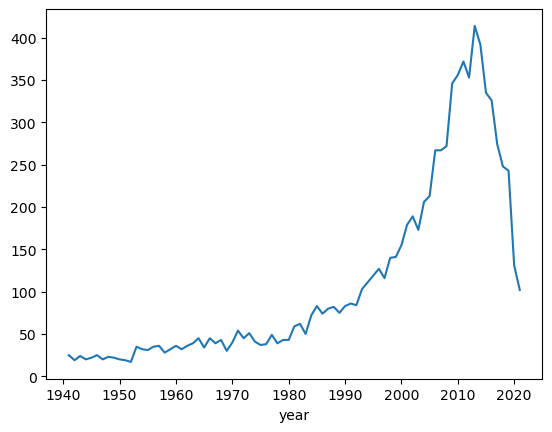

In [41]:
bechdel_data_filtered.groupby("year")["rating"].count().plot()

In [43]:
pass_rate=lambda x:(x==3).sum()/(x.count())

passrate_per_year=bechdel_data_filtered.groupby("year")["rating"].agg(pass_rate)

<AxesSubplot:xlabel='year'>

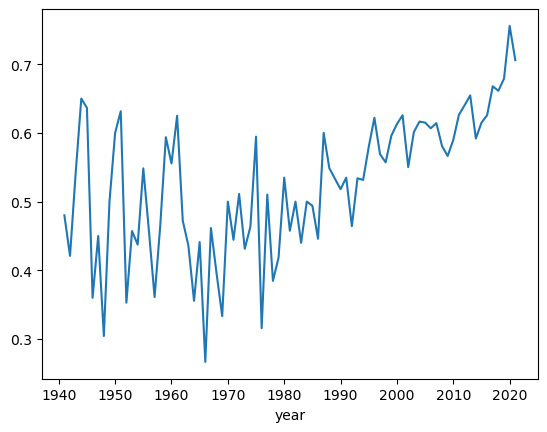

In [44]:
passrate_per_year.plot()